In [1]:
# Adding src module to path
import sys
import os
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
# general imports
from datetime import datetime
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import src.utils as utils
from src.ansatz import RBM


## Testing hidden node accuracy

Training several RBMs with increasing number of visible nodes. For each RBM we test how increasing the number of hidden nodes affects accuracy.

Total:   0%|          | 0/3 [00:00<?, ?it/s]

Training:   0%|          | 0/5 [00:00<?, ?it/s]

func:'train' args:[(<src.ansatz.RBM object at 0x000002CB344EF3A0>,), {'iter': 1000, 'lr': 0.01}] took: 0.5225 sec
func:'train' args:[(<src.ansatz.RBM object at 0x000002CB344EFD30>,), {'iter': 1000, 'lr': 0.01}] took: 0.5150 sec
func:'train' args:[(<src.ansatz.RBM object at 0x000002CB344EFDF0>,), {'iter': 1000, 'lr': 0.01}] took: 0.5240 sec
func:'train' args:[(<src.ansatz.RBM object at 0x000002CB344EF280>,), {'iter': 1000, 'lr': 0.01}] took: 0.5931 sec
func:'train' args:[(<src.ansatz.RBM object at 0x000002CB344EF070>,), {'iter': 1000, 'lr': 0.01}] took: 0.6189 sec


<IPython.core.display.Javascript object>


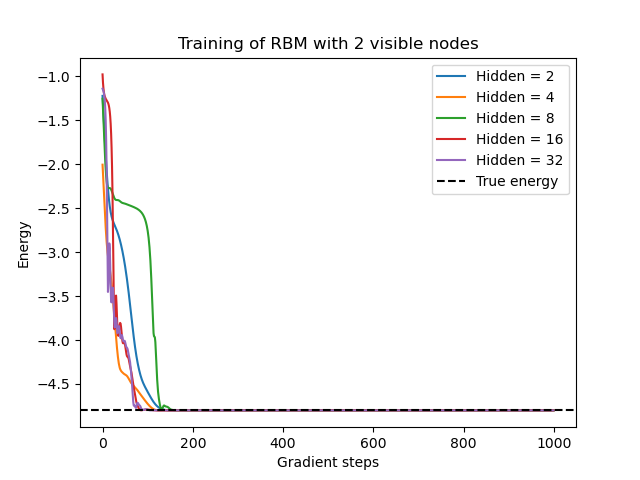

Training:   0%|          | 0/5 [00:00<?, ?it/s]

func:'train' args:[(<src.ansatz.RBM object at 0x000002CB3526D6A0>,), {'iter': 1000, 'lr': 0.01}] took: 0.5182 sec
func:'train' args:[(<src.ansatz.RBM object at 0x000002CB3526D400>,), {'iter': 1000, 'lr': 0.01}] took: 0.5313 sec
func:'train' args:[(<src.ansatz.RBM object at 0x000002CB3526D340>,), {'iter': 1000, 'lr': 0.01}] took: 0.5719 sec
func:'train' args:[(<src.ansatz.RBM object at 0x000002CB3526D250>,), {'iter': 1000, 'lr': 0.01}] took: 0.6506 sec
func:'train' args:[(<src.ansatz.RBM object at 0x000002CB344EF070>,), {'iter': 1000, 'lr': 0.01}] took: 0.7758 sec


<IPython.core.display.Javascript object>


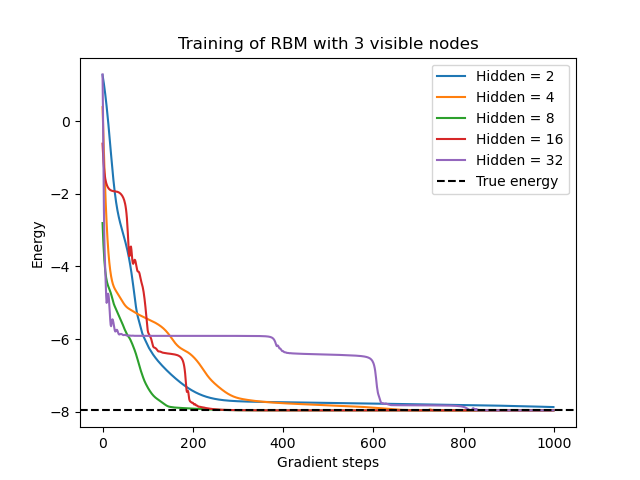

Training:   0%|          | 0/5 [00:00<?, ?it/s]

func:'train' args:[(<src.ansatz.RBM object at 0x000002CB3520BB20>,), {'iter': 1000, 'lr': 0.01}] took: 0.5600 sec
func:'train' args:[(<src.ansatz.RBM object at 0x000002CB352EDE80>,), {'iter': 1000, 'lr': 0.01}] took: 0.6205 sec
func:'train' args:[(<src.ansatz.RBM object at 0x000002CB352B25B0>,), {'iter': 1000, 'lr': 0.01}] took: 0.6974 sec
func:'train' args:[(<src.ansatz.RBM object at 0x000002CB352EDF70>,), {'iter': 1000, 'lr': 0.01}] took: 0.8931 sec
func:'train' args:[(<src.ansatz.RBM object at 0x000002CB352B25B0>,), {'iter': 1000, 'lr': 0.01}] took: 1.4150 sec


<IPython.core.display.Javascript object>


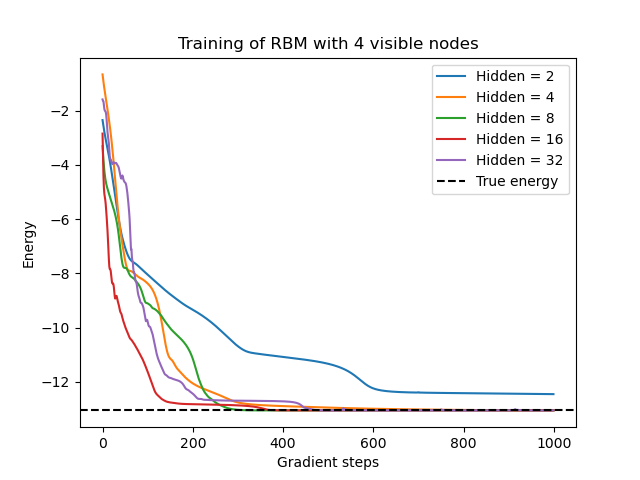

In [3]:

#Initializing starting values 
n_vis = 2
vis_inc = 1
total_vis = 3


n_hid_start = 2
n_hid = n_hid_start
hid_inc = 2
total_hid = 5

energy_list = []
n_hid_list =[]

seed = 42


username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d;%H%M'

path = f"{desktop_path}\\{datetime.now().strftime(date_format)}-RBMplots"
os.makedirs(path)

for i in tqdm(range(total_vis), position=0, desc=f"Total", leave=False, colour='green'):
    
    #Finding true ground state energy and displaying it
    np.random.seed(seed)
    
    hamiltonian = utils.random_hamiltonian(2**n_vis)
    eig,_ = np.linalg.eigh(hamiltonian)
    E_truth = np.min(eig)
    #print(f"Energy truth: {E_truth}")
    
    for j in tqdm(range(total_hid), position=1, desc=f"Training", leave=False, colour='red'):
        np.random.seed(seed)
        
        hamiltonian = utils.random_hamiltonian(2**n_vis)

        rbm = RBM(visible_size=n_vis, hidden_size=n_hid, hamiltonian=hamiltonian)
        energy_list.append(rbm.train(iter=1000, lr=0.01))
        n_hid_list.append(n_hid)
        n_hid *= hid_inc
    
    # Print loop    
    labels = [f"Hidden = {i}" for i in n_hid_list]
    labels.append("True energy")
    
    # plt.ioff() # uncomment to stop plotting in notebook
    plt.figure(i)
    
    
    for energy in energy_list:
        plt.plot(energy)
        plt.xlabel('Gradient steps')
        plt.ylabel('Energy')

    plt.title(f"Training of RBM with {n_vis} visible nodes")
    plt.axhline(y=E_truth, color='k', linestyle='--')
    plt.legend(labels)

    # Save figure as pdf
    plt.savefig(f"{path}/{n_vis}nodes.pdf")
    
    n_vis += vis_inc
    n_hid = n_hid_start
    energy_list.clear()
    n_hid_list.clear()
    labels.clear()

